# ProsperLoan Dataset Exploration
## by Caleb Omariba


## INTRODUCTION
> This dataset consists 113,937 loans with 81 features on each loan, which include:loan amount, borrower rate (or interest rate), current loan status, borrower income, and many features.

> The data features information can be found [here ](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

## INVESTIGATION OVERVIEW
In this project i focus on which features affect the BorrowerAPR.I select 10 features from the data which i explore through the project. My focus is on how the prosper score relatd to the BorrowerAPR and how LenderYield relates with the APR.I go farther to explore other features step by step to draw insights which i have reported along my project.

In [60]:
#importing some important libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [61]:
#loading the prosperloan dataset 
loans_df=pd.read_csv("prosperLoanData.csv")

In [62]:
#renaming some column titles that will be used in the analysis
loans_df.rename(columns = {'ProsperRating (numeric)':'ProsperRating_numeric', 'ListingCategory (numeric)':'ListingCategory_numeric', 'ProsperRating (Alpha)': 'ProsperRating_Alpha'}, inplace = True)

In [63]:
new_loans_df=loans_df.loc[:,('Term',
                     'BorrowerAPR',
                     'ProsperScore',
                     'LenderYield',
                     'LoanOriginalAmount',
                     'LoanStatus',
                     'ProsperRating_Alpha',
                     'ListingCategory_numeric',
                     'Occupation',
                     'IncomeRange',)
                     ]

In [64]:
#Converting ProsperRating_Alpha and IncomeRange to ordinal categorical datatype. 
ordinal_variable_dictionary = {'ProsperRating_Alpha': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],\
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_variable_dictionary:
    ordered_variable = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_variable_dictionary[var])
    new_loans_df[var] = new_loans_df[var].astype(ordered_variable)

In [65]:
#Replacing listingcategory_numeric to their respective names using the map method.
category_number_name = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

new_loans_df['ListingCategory_numeric'] = new_loans_df['ListingCategory_numeric'].map(category_number_name)

In [66]:
new_loans_df.Occupation = new_loans_df.Occupation.astype('category')
new_loans_df.LoanStatus = new_loans_df.LoanStatus.astype('category')
new_loans_df.ListingCategory_numeric = new_loans_df.ListingCategory_numeric.astype('category')

In [67]:
#Creating a dataset from the 10 selected features that we shall explore in the project.
Master_df=pd.read_csv("master_df.csv")
Master_df.sample(5)

,Term,BorrowerAPR,ProsperScore,LenderYield,LoanOriginalAmount,LoanStatus,ProsperRating_Alpha,ListingCategory_numeric,Occupation,IncomeRange
77143,36,0.34045,5.0,0.2906,2000,Current,E,Other,Other,"$25,000-49,999"
597,60,0.17849,8.0,0.1451,23500,Past Due (61-90 days),A,Debt Consolidation,Retail Management,"$50,000-74,999"
37380,36,0.17322,NaN,0.1415,5000,Completed,NaN,Auto,Student - College Graduate Student,"$1-24,999"
45965,36,0.27111,NaN,0.2458,8000,Chargedoff,NaN,Not Available,Analyst,"$50,000-74,999"
18958,36,0.14709,NaN,0.1300,6000,Defaulted,NaN,Not Available,Clerical,"$100,000+"


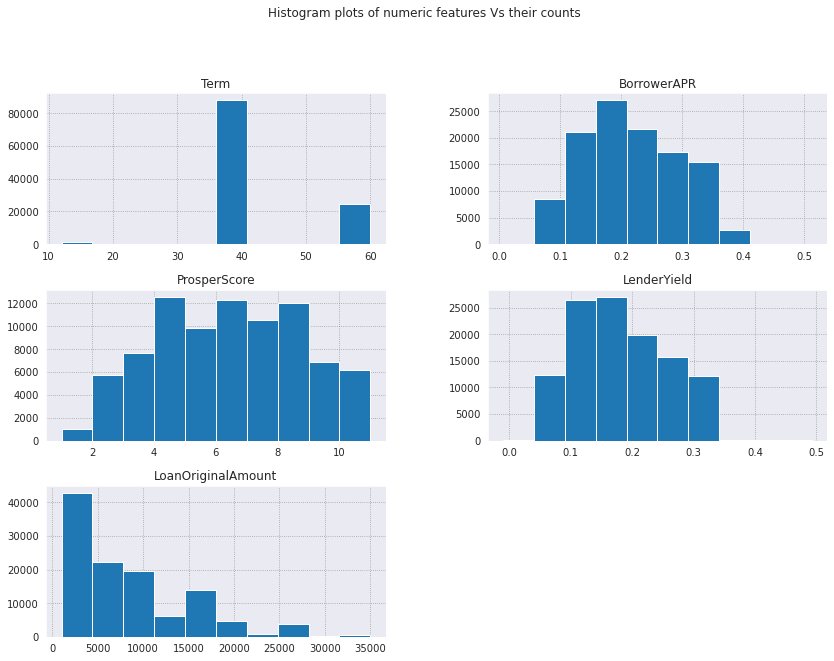

In [68]:
#plotting general histograms of numeric features of the selected dataset
Master_df.hist(figsize = [14, 10]);
plt.suptitle("Histogram plots of numeric features Vs their counts", y = 1);

* Loanoriginalamount appears to be skewed to the left.
* BorrowerAPR appears to have a normal distribution.
* Most loans have a term of of 36 months with the least loans having 12 month term
* Prosperscore have a picks at score 5, 6 and 9

### **Investigating the distribution of `BORROWERAPR`**

BorrowerAPR seems to be symmetric/ normally distributed as it forms a bell shape, but a peak can be observed at is around the  0.36  mark. Though we can observe other peaks at 0.16 and 0.18

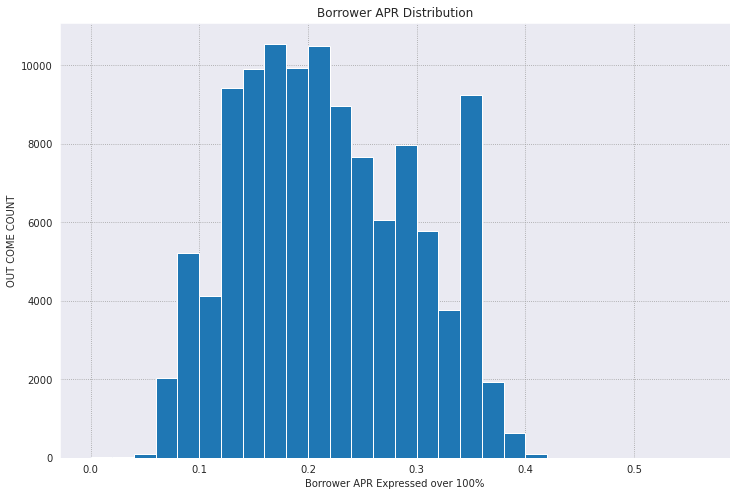

In [80]:
bins = np.arange(0, Master_df.BorrowerAPR.max()+0.06, 0.02)
plt.figure(figsize=[12, 8])
plt.hist(data = Master_df, x = 'BorrowerAPR', bins = bins);
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower APR Expressed over 100%')
plt.ylabel('OUT COME COUNT');

## __Investigating the distribution of **`prosper score`.**__

* It can also be note that most loanees have a prosper score of 4 ,6 and 8 with the least being 11 and 1 scores.

In [75]:
#function to plot countplots for various features
def countplot(dataframe,x_variable,colors,order):
    """ This function takes in the dataframe,x variable,the color of the plot and the order of the plotting."""
    sns.countplot(data=dataframe,x=x_variable,color=colors)

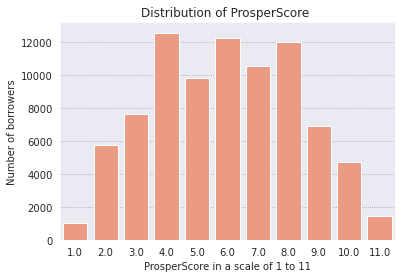

In [82]:
base_color = sns.color_palette()[2]
countplot(Master_df,'ProsperScore','#fc9272',order='ProsperScore')
plt.title('Distribution of ProsperScore ')
plt.ylabel('Number of borrowers')
plt.xlabel('ProsperScore in a scale of 1 to 11');

## **Investigating `LenderYield distribution.`**

* Most of the loans have a Lender Yield of 16% and 18%.

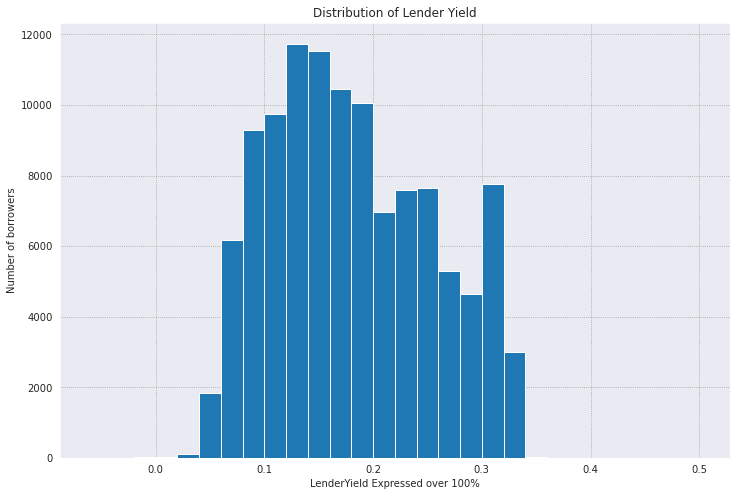

In [81]:
binsize = 0.02
bins = np.arange(-.06, Master_df['LenderYield'].max()+binsize, binsize)
plt.figure(figsize=[12, 8])
plt.hist(data = Master_df, x = 'LenderYield', bins = bins)
plt.xlabel('LenderYield Expressed over 100%')
plt.ylabel('Number of borrowers')
plt.title('Distribution of Lender Yield')
plt.show()

## **Investigating the relationship among,LenderYield,BorrowerAPR,ProsperScore.**

* We can observe from the prosper score that the higher the prosper score the lower the customer risk  attached to the loan therefore the borrower will incur less borrower APR which makes the LenderYield lower respectively.

* We can observe that borrowerAPR and LenderYield have a strong  +ve correlation. This is logical because the more the interest borrowers pay the more will be obtained by the lender.

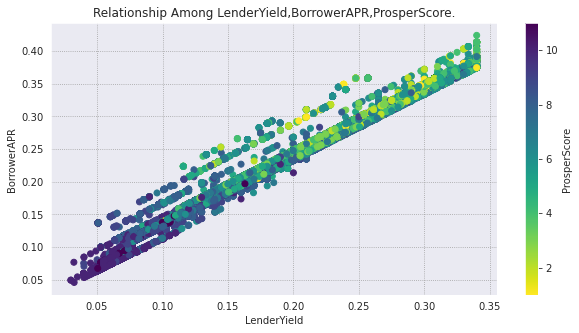

In [73]:
#plotting a scatter plotter with correlations
plt.figure(figsize = [10, 5])
plt.scatter(data=Master_df,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('LenderYield')
plt.ylabel('BorrowerAPR')
plt.title('Relationship Among LenderYield,BorrowerAPR,ProsperScore.');

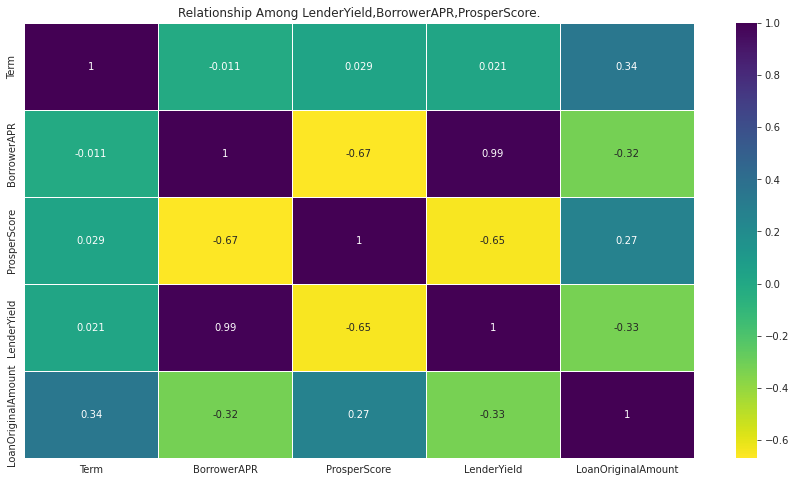

In [74]:
plt.figure(figsize = [15, 8])
sns.heatmap(Master_df.corr(), linewidths=.5, cmap = "viridis_r",annot=True);
plt.title('Relationship Among LenderYield,BorrowerAPR,ProsperScore.');

In [ ]:
!jupyter nbconvert Part_2_Slide_deck.ipynb --to slides --post serve --no-input --no-prompt